In [37]:
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as mp
import sys
import os
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# testing preprocessing pipeline

- src/preprocessing contains fns to be called
- load_raw_data("csv_name") returns data as df_raw
- run_preprocessing("csv_name") runs the entire pipeline and,
   1.  saves a csv named as processed_data.csv in data/processed folder
   2. returns df_preprocessed 

In [15]:
# Go up one level to the project root
sys.path.append(os.path.abspath(".."))

from src.preprocessing import run_preprocessing,load_raw_data

In [8]:
df_raw=load_raw_data("station_day.csv")
df_raw

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,2017-11-24,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,0.10,NaN,NaN
1,AP001,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate
2,AP001,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate
3,AP001,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate
4,AP001,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108030,WB013,2020-06-27,8.65,16.46,NaN,NaN,NaN,NaN,0.69,4.36,30.59,1.32,7.26,NaN,50.0,Good
108031,WB013,2020-06-28,11.80,18.47,NaN,NaN,NaN,NaN,0.68,3.49,38.95,1.42,7.92,NaN,65.0,Satisfactory
108032,WB013,2020-06-29,18.60,32.26,13.65,200.87,214.20,11.40,0.78,5.12,38.17,3.52,8.64,NaN,63.0,Satisfactory
108033,WB013,2020-06-30,16.07,39.30,7.56,29.13,36.69,29.26,0.69,5.88,29.64,1.86,8.40,NaN,57.0,Satisfactory


In [16]:
df_preprocessed=run_preprocessing("station_day.csv")
df_preprocessed

,Date,PM2.5,PM10,NO,NO2,NH3,CO,SO2,O3,AQI
20277,2015-01-01,0.200928,0.622428,0.038919,0.027631,0.117510,0.124111,0.047831,0.149358,364.0
20278,2015-01-02,0.251090,0.449183,0.059384,0.038189,0.127683,0.075593,0.036438,0.115167,410.0
11907,2015-01-02,0.172097,0.275938,0.052418,0.091443,0.121786,0.007679,0.033769,0.080977,497.0
11908,2015-01-03,0.084383,0.135010,0.023183,0.091242,0.115888,0.008759,0.031099,0.059679,141.0
20279,2015-01-03,0.095944,0.191289,0.027842,0.037698,0.109990,0.053694,0.028430,0.068023,404.0
...,...,...,...,...,...,...,...,...,...,...
41736,2020-07-01,0.018651,0.113162,0.008177,0.016360,0.057237,0.011831,0.048503,0.031111,101.0
43652,2020-07-01,0.037962,0.116684,0.003038,0.060508,0.031422,0.005119,0.034718,0.010301,73.0
44534,2020-07-01,0.029426,0.146375,0.003198,0.078152,0.274893,0.004351,0.039609,0.013282,108.0
100779,2020-07-01,0.020891,0.091857,0.053308,0.095795,0.174666,0.003583,0.027302,0.023385,68.0


In [5]:
df_raw.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,86410.000000,65329.000000,90929.000000,91488.000000,92535.000000,59930.000000,95037.000000,82831.000000,82467.000000,76580.000000,69333.000000,22898.000000,87025.000000
mean,80.272571,157.968427,23.123424,35.240760,41.195055,28.732875,1.605749,12.257634,38.134836,3.358029,15.345394,2.423446,179.749290
std,76.526403,123.418672,34.491019,29.510827,45.145976,24.897797,4.369578,12.984723,39.128004,11.156234,29.348587,6.472409,131.324339
min,0.020000,0.010000,0.010000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,8.000000
25%,31.880000,70.150000,4.840000,15.090000,13.970000,11.900000,0.530000,5.040000,18.895000,0.160000,0.690000,0.000000,86.000000
50%,55.950000,122.090000,10.290000,27.210000,26.660000,23.590000,0.910000,8.950000,30.840000,1.210000,4.330000,0.400000,132.000000
75%,99.920000,208.670000,24.980000,46.930000,50.500000,38.137500,1.450000,14.920000,47.140000,3.610000,17.510000,2.110000,254.000000
max,1000.000000,1000.000000,470.000000,448.050000,467.630000,418.900000,175.810000,195.650000,963.000000,455.030000,454.850000,170.370000,2049.000000


In [5]:
df_preprocessed.describe()


,Date,PM2.5,PM10,NO,NO2,NH3,CO,SO2,O3,AQI
count,85142,85142.000000,85142.000000,85142.000000,85142.000000,85142.000000,85142.000000,85142.000000,85142.000000,85142.000000
mean,2018-11-28 12:44:45.095487488,0.075792,0.159306,0.050049,0.076079,0.078905,0.008016,0.063828,0.039947,169.611696
min,2015-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
25%,2018-04-24 00:00:00,0.031661,0.076159,0.010758,0.033524,0.037712,0.003413,0.028054,0.020187,85.000000
50%,2019-03-10 00:00:00,0.055212,0.129482,0.022771,0.059794,0.067082,0.005404,0.048853,0.032503,130.000000
75%,2019-11-24 00:00:00,0.097021,0.213486,0.053811,0.101710,0.102631,0.008191,0.079056,0.049284,241.000000
max,2020-07-01 00:00:00,0.868655,0.978326,1.000000,1.000000,0.965023,1.000000,1.000000,0.901557,500.000000
std,NaN,0.065321,0.111987,0.074193,0.061601,0.061507,0.015538,0.060111,0.039134,110.093760


# testing training ESN pipeline


In [20]:
from src.train_esn import train_esn_pollutant
from src.config import POLLUTANTS

In [21]:
for pollutant in POLLUTANTS:
    train_esn_pollutant(df_preprocessed, pollutant)

change logged2
change logged2
change logged2
change logged2
change logged2
change logged2
change logged2
change logged2


should expect esn_<"pollutant">.pkl inside models folder after this ....

## hyperparams tuning 

In [3]:
from src.esn_hyperparams_tuning import run_hyperparams
run_hyperparams()

Best for PM2.5: {'n_reservoir': 200, 'sparsity': 0.1, 'spectral_radius': 1.0}, RMSE=0.0401
Best for PM10: {'n_reservoir': 100, 'sparsity': 0.3, 'spectral_radius': 0.9}, RMSE=0.0722
Best for NO: {'n_reservoir': 100, 'sparsity': 0.1, 'spectral_radius': 1.0}, RMSE=0.0650
Best for NO2: {'n_reservoir': 200, 'sparsity': 0.1, 'spectral_radius': 0.9}, RMSE=0.0451
Best for CO: {'n_reservoir': 100, 'sparsity': 0.3, 'spectral_radius': 1.0}, RMSE=0.0053
Best for SO2: {'n_reservoir': 100, 'sparsity': 0.3, 'spectral_radius': 1.0}, RMSE=0.0489
Best for O3: {'n_reservoir': 100, 'sparsity': 0.3, 'spectral_radius': 0.9}, RMSE=0.0298
Best for NH3: {'n_reservoir': 100, 'sparsity': 0.3, 'spectral_radius': 0.9}, RMSE=0.0504
best configs saved !


# Testing esn 

updated
Predicting for PM2.5...


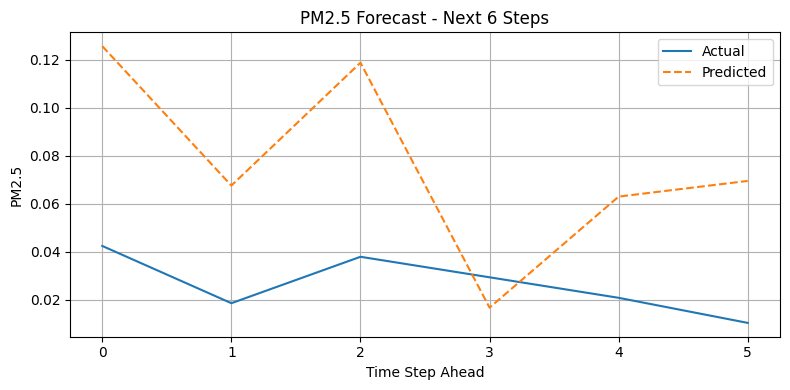

Predicting for PM10...


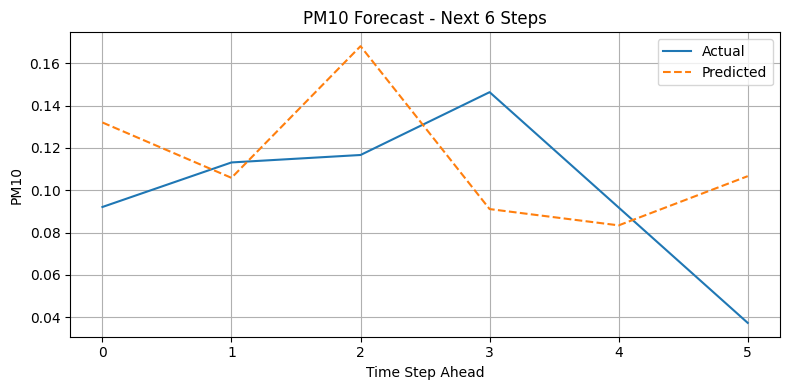

Predicting for NO...


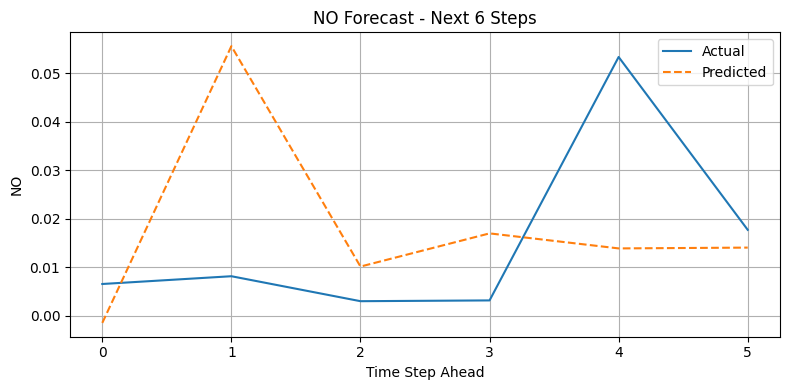

Predicting for NO2...


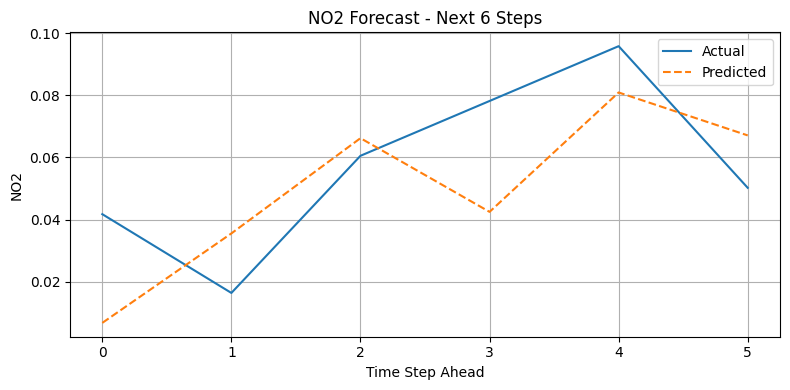

Predicting for CO...


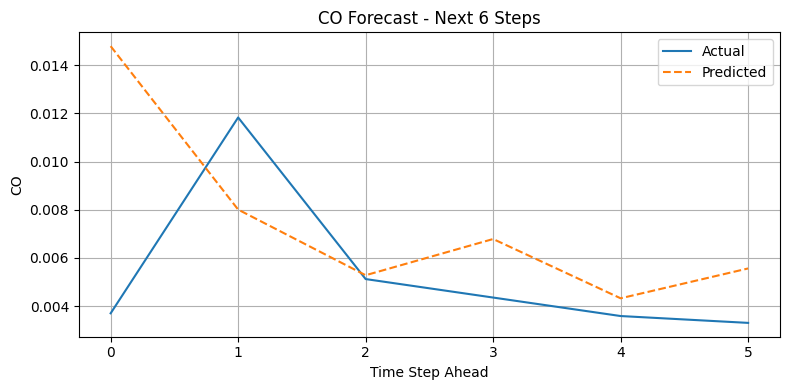

Predicting for SO2...


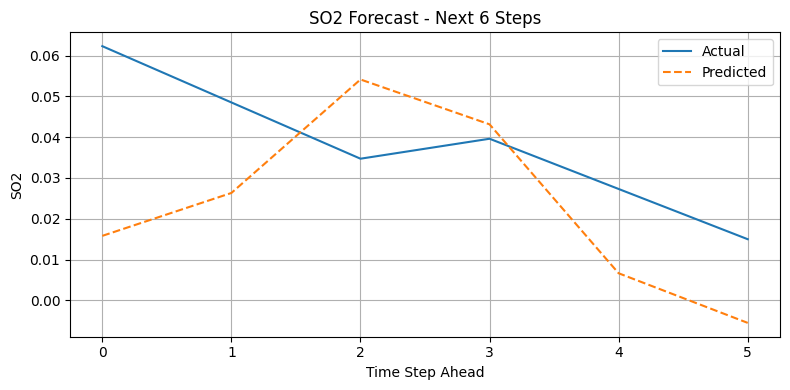

Predicting for O3...


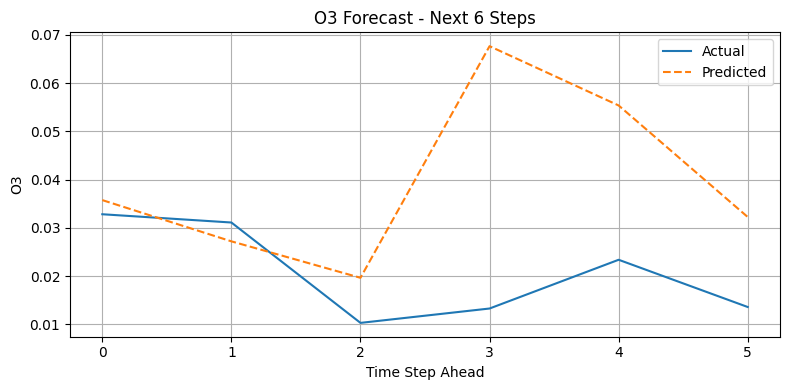

Predicting for NH3...


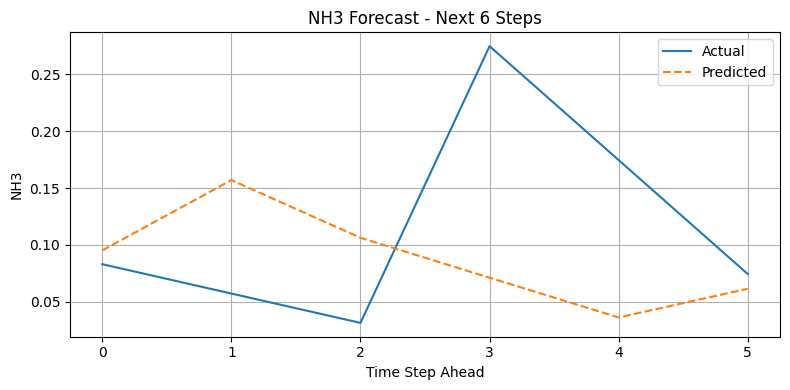

In [38]:
from src.test_esn import test_all_esns
test_all_esns()